In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
import torch
sys.path.append(os.path.join(os.path.abspath(''), '../src'))
from scoring_rules import crps, DS, pmcc, KS
from estimation import sgd_estimation, conf_int
from simulation_model import lindley
from plot import plot_loss
from tqdm import tqdm
from kernels import Riesz, Gaussian
import matplotlib.pyplot as plt

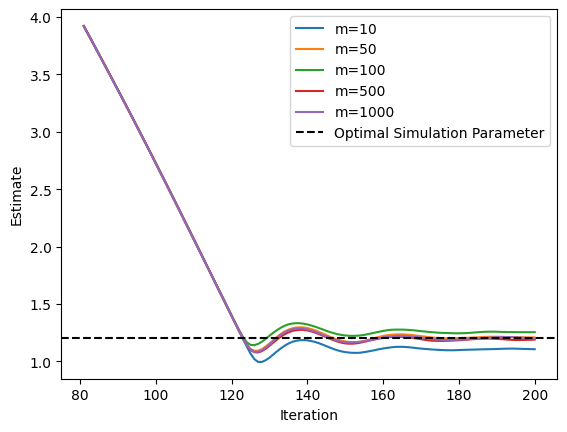

In [9]:
# Riesz kernel (Energy Score), M/M/1 example
theta_opt = np.array([1.2])
macro_count = 1
n = 1000
index = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
iterations = np.arange(81, 201)
for m in [10, 50, 100, 500, 1000]: 
    x_sample = lindley(1.2, replications=m).to(device)
    theta_tilde, loss_list, param_list = sgd_estimation(lindley, x_sample, crps, float(10), 
                                     simulation_replications=n, number_epochs = 200, lr_init = 0.3, device = device)
    plt.plot(iterations, param_list[80:201], label=f"m={m}")
# Add labels and legend
plt.axhline(y=theta_opt, color='black', linestyle='--', label='Optimal Simulation Parameter')
plt.xlabel("Iteration")
plt.ylabel("Estimate")
plt.legend()

# Display the plot
plt.show()

100%|██████████| 100/100 [09:47<00:00,  5.88s/it]


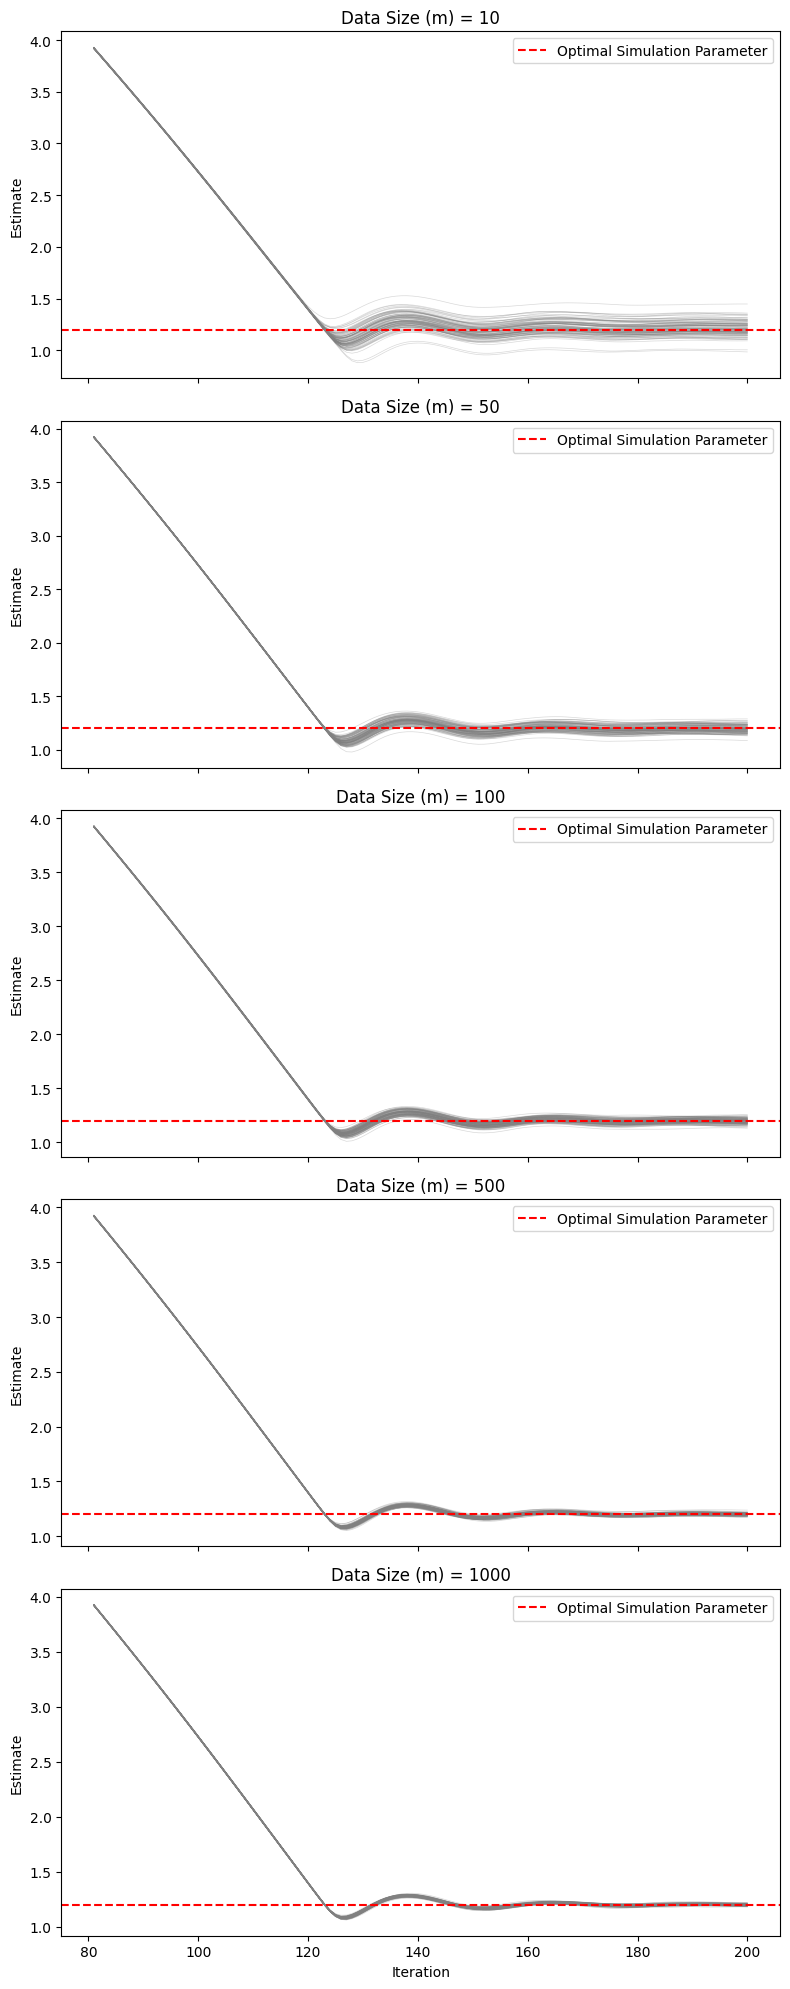

In [4]:
# Riesz kernel (Energy Score), M/M/1 example
theta_opt = np.array([1.2])
macro_count = 100
n = 1000
index = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
iterations = np.arange(81, 201)
i = 0
# Create a figure and subplots
data_sizes = [10, 50, 100, 500, 1000]
fig, axes = plt.subplots(len(data_sizes), 1, figsize=(8, 4*len(data_sizes)), sharex=True)
for m in data_sizes: 
    for k in tqdm(range(macro_count)):
        x_sample = lindley(1.2, replications=m).to(device)
        theta_tilde, loss_list, param_list = sgd_estimation(lindley, x_sample, crps, float(10), 
                                     simulation_replications=n, number_epochs = 200, lr_init = 0.3, device = device)
        axes[i].plot(iterations, param_list[80:201], color='grey', alpha=0.3, linewidth=0.5)
    axes[i].axhline(y=theta_opt, color='red', linestyle='--', label='Optimal Simulation Parameter')
    # Add labels and legend for each subplot
    axes[i].set_title(f"Data Size (m) = {m}")
    axes[i].set_ylabel("Estimate")
    axes[i].legend()
    i += 1
# Add x-label for the last subplot
axes[-1].set_xlabel("Iteration")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

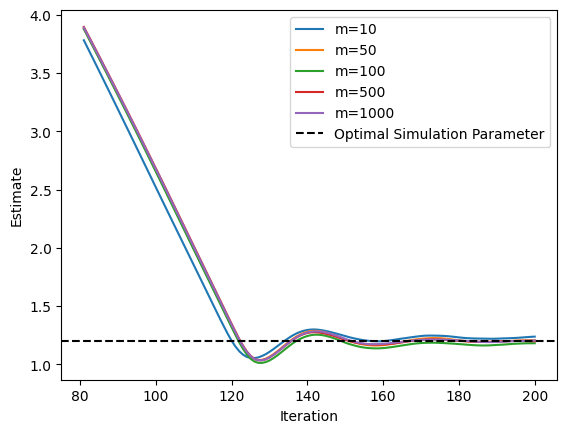

In [10]:
# Gaussian RBF kernel (kernel score), M/M/1 example
theta_opt = np.array([1.2])
macro_count = 1
n = 1000
index = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
iterations = np.arange(81, 201)
for m in [10, 50, 100, 500, 1000]: 
    x_sample = lindley(1.2, replications=m).to(device)
    theta_tilde, loss_list, param_list = sgd_estimation(lindley, x_sample, KS, float(10), 
                                     simulation_replications=n, number_epochs = 200, lr_init = 0.3, device = device)
    plt.plot(iterations, param_list[80:201], label=f"m={m}")
# Add labels and legend
plt.axhline(y=theta_opt, color='black', linestyle='--', label='Optimal Simulation Parameter')
plt.xlabel("Iteration")
plt.ylabel("Estimate")
plt.legend()

# Display the plot
plt.show()

100%|██████████| 100/100 [14:31<00:00,  8.72s/it]


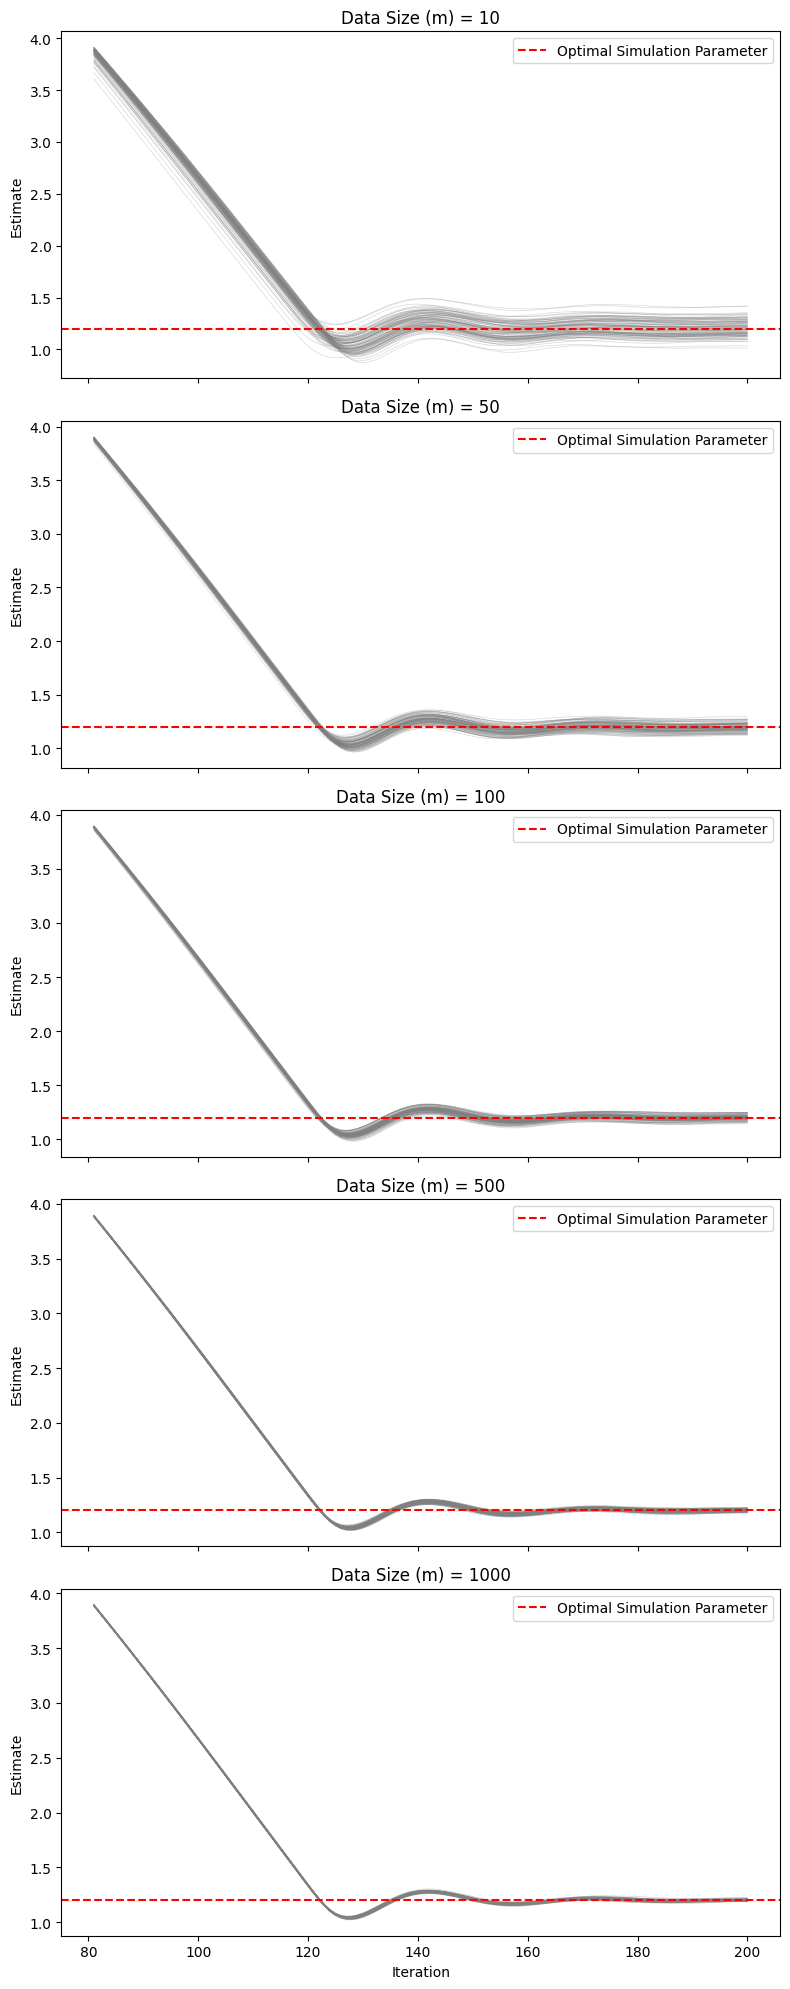

In [5]:
# Gaussian RBF kernel (kernel score), M/M/1 example
theta_opt = np.array([1.2])
macro_count = 100
n = 1000
index = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
iterations = np.arange(81, 201)
i = 0
# Create a figure and subplots
data_sizes = [10, 50, 100, 500, 1000]
fig, axes = plt.subplots(len(data_sizes), 1, figsize=(8, 4*len(data_sizes)), sharex=True)
for m in data_sizes: 
    for k in tqdm(range(macro_count)):
        x_sample = lindley(1.2, replications=m).to(device)
        theta_tilde, loss_list, param_list = sgd_estimation(lindley, x_sample, KS, float(10), 
                                     simulation_replications=n, number_epochs = 200, lr_init = 0.3, device = device)
        axes[i].plot(iterations, param_list[80:201], color='grey', alpha=0.3, linewidth=0.5)
    axes[i].axhline(y=theta_opt, color='red', linestyle='--', label='Optimal Simulation Parameter')
    # Add labels and legend for each subplot
    axes[i].set_title(f"Data Size (m) = {m}")
    axes[i].set_ylabel("Estimate")
    axes[i].legend()
    i += 1
# Add x-label for the last subplot
axes[-1].set_xlabel("Iteration")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [4]:
# Inexact model
x_sample_large = lindley(service_rate=2, service_shape_parameter=0.5, replications=5000)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
theta_opt, _, theta_list = sgd_estimation(lindley, x_sample_large, crps, 2.0, 
                                 simulation_replications=1000, number_epochs=500, lr_init=0.3, device=device)
if True:
    theta_opt = np.mean(theta_list[-100:])
theta_opt

3.4232676

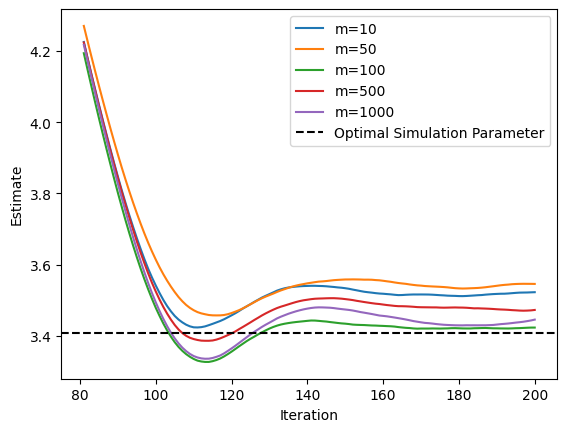

In [19]:
macro_count = 1
n = 1000
index = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
iterations = np.arange(81, 201)
for m in [10, 50, 100, 500, 1000]: 
    x_sample = lindley(service_rate=2, service_shape_parameter=0.5, replications=m).to(device)
    theta_tilde, loss_list, param_list = sgd_estimation(lindley, x_sample, crps, float(10), 
                                     simulation_replications=n, number_epochs = 200, lr_init = 0.3, device = device)
    plt.plot(iterations, param_list[80:201], label=f"m={m}")
# Add labels and legend
plt.axhline(y=theta_opt, color='black', linestyle='--', label='Optimal Simulation Parameter')
plt.xlabel("Iteration")
plt.ylabel("Estimate")
plt.legend()

# Display the plot
plt.show()

100%|██████████| 100/100 [09:46<00:00,  5.87s/it]


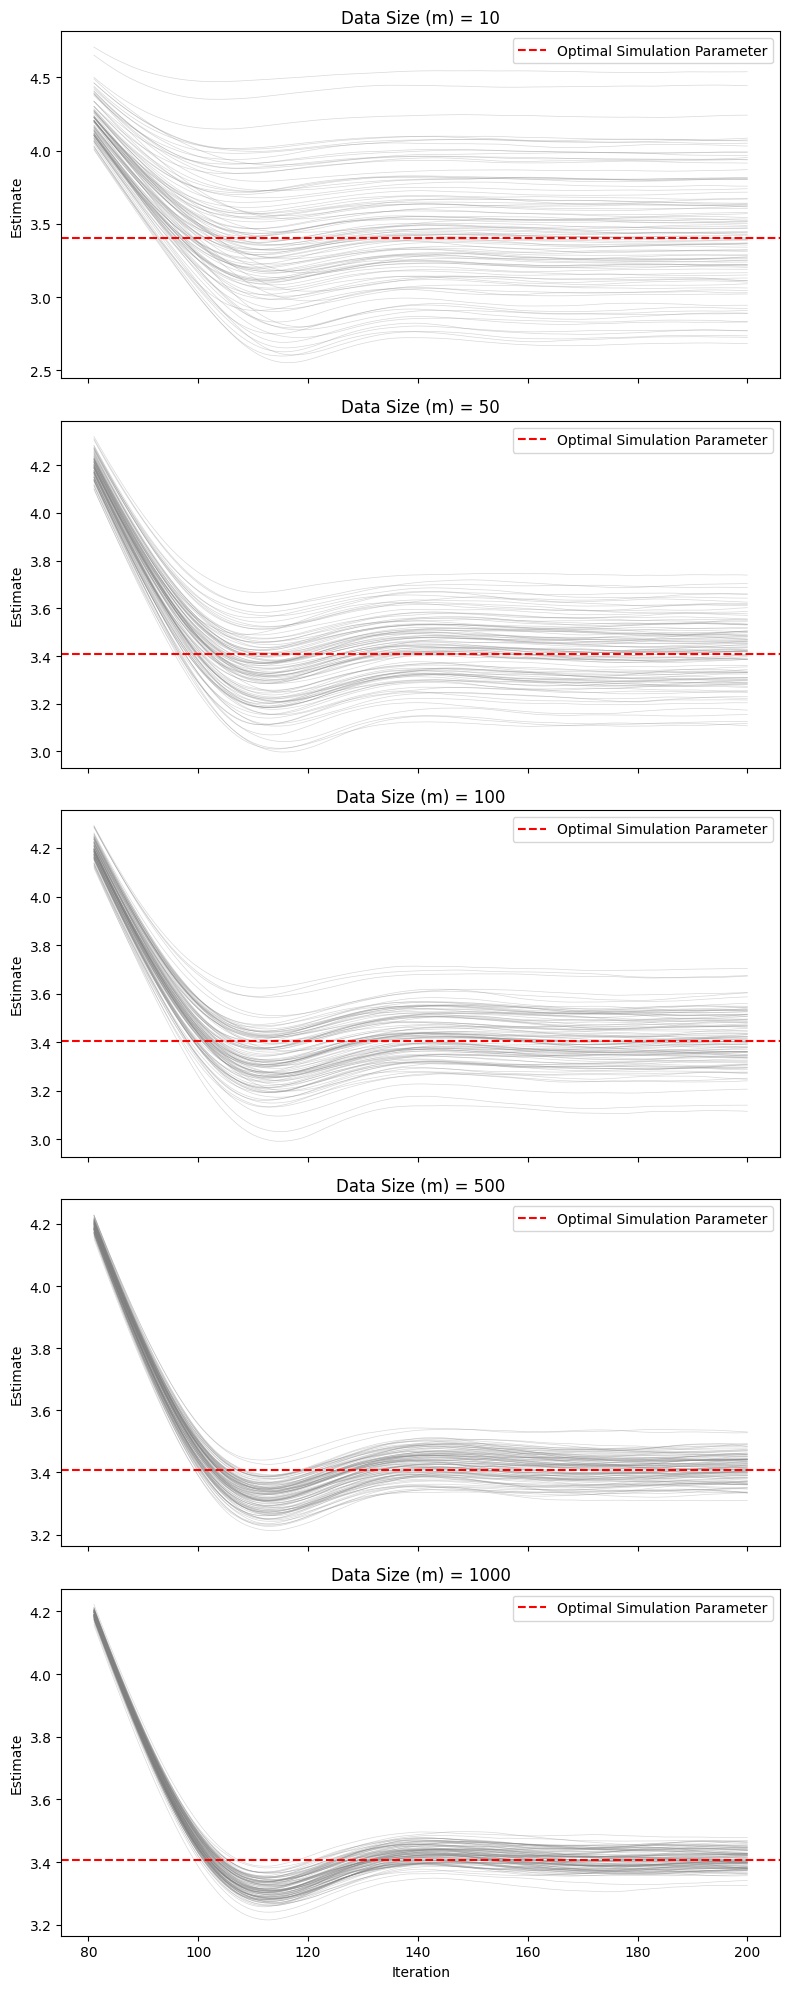

In [20]:
# Riesz kernel (Energy Score), M/M/1 example
macro_count = 100
n = 1000
index = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
iterations = np.arange(81, 201)
i = 0
# Create a figure and subplots
data_sizes = [10, 50, 100, 500, 1000]
fig, axes = plt.subplots(len(data_sizes), 1, figsize=(8, 4*len(data_sizes)), sharex=True)
for m in data_sizes: 
    for k in tqdm(range(macro_count)):
        x_sample = lindley(service_rate=2, service_shape_parameter=0.5, replications=m).to(device)
        theta_tilde, loss_list, param_list = sgd_estimation(lindley, x_sample, crps, float(10), 
                                     simulation_replications=n, number_epochs = 200, lr_init = 0.3, device = device)
        axes[i].plot(iterations, param_list[80:201], color='grey', alpha=0.3, linewidth=0.5)
    axes[i].axhline(y=theta_opt, color='red', linestyle='--', label='Optimal Simulation Parameter')
    # Add labels and legend for each subplot
    axes[i].set_title(f"Data Size (m) = {m}")
    axes[i].set_ylabel("Estimate")
    axes[i].legend()
    i += 1
# Add x-label for the last subplot
axes[-1].set_xlabel("Iteration")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

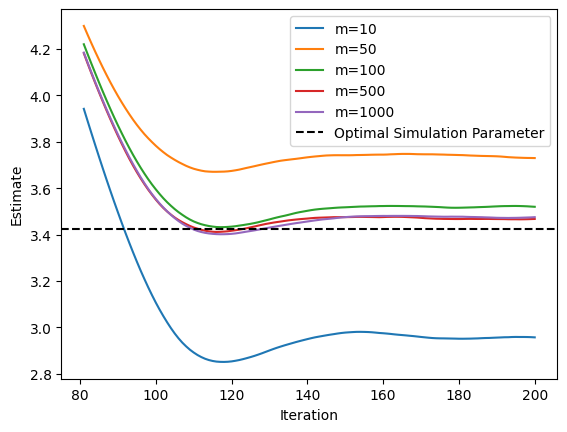

In [5]:
macro_count = 1
n = 1000
index = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
iterations = np.arange(81, 201)
for m in [10, 50, 100, 500, 1000]: 
    x_sample = lindley(service_rate=2, service_shape_parameter=0.5, replications=m).to(device)
    theta_tilde, loss_list, param_list = sgd_estimation(lindley, x_sample, KS, float(10), 
                                     simulation_replications=n, number_epochs = 200, lr_init = 0.3, device = device)
    plt.plot(iterations, param_list[80:201], label=f"m={m}")
# Add labels and legend
plt.axhline(y=theta_opt, color='black', linestyle='--', label='Optimal Simulation Parameter')
plt.xlabel("Iteration")
plt.ylabel("Estimate")
plt.legend()

# Display the plot
plt.show()

100%|██████████| 100/100 [15:03<00:00,  9.04s/it]


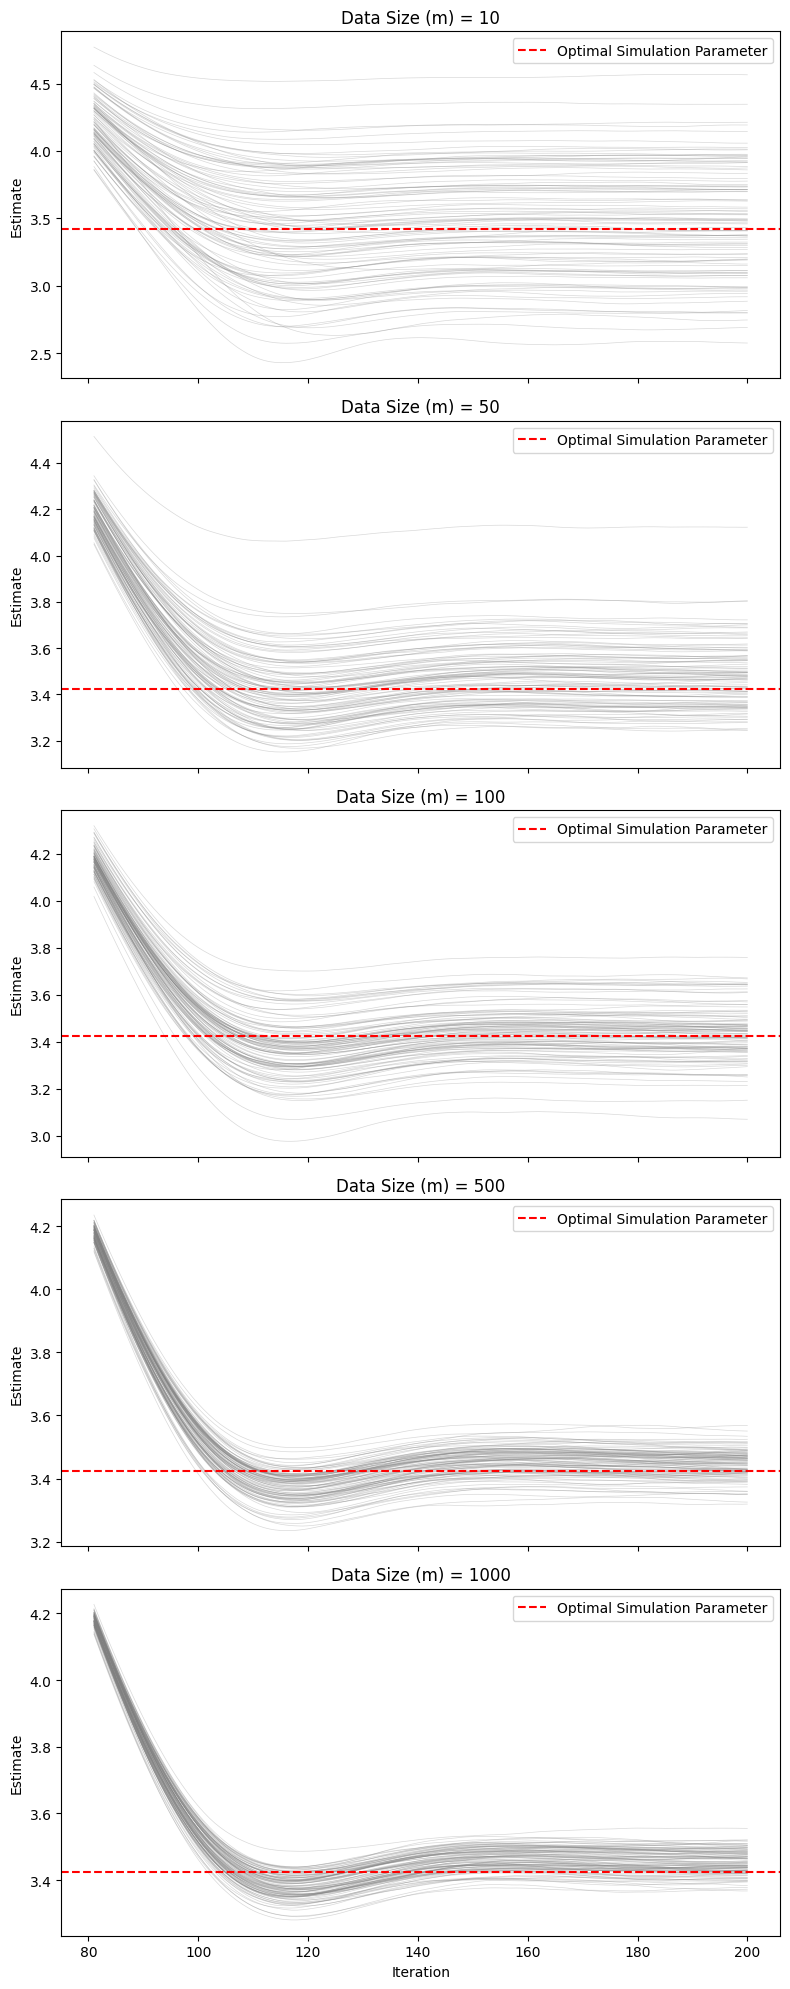

In [6]:
# Gaussian kernel (Kernel Score), M/M/1 example
macro_count = 100
n = 1000
index = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
iterations = np.arange(81, 201)
i = 0
# Create a figure and subplots
data_sizes = [10, 50, 100, 500, 1000]
fig, axes = plt.subplots(len(data_sizes), 1, figsize=(8, 4*len(data_sizes)), sharex=True)
for m in data_sizes: 
    for k in tqdm(range(macro_count)):
        x_sample = lindley(service_rate=2, service_shape_parameter=0.5, replications=m).to(device)
        theta_tilde, loss_list, param_list = sgd_estimation(lindley, x_sample, KS, float(10), 
                                     simulation_replications=n, number_epochs = 200, lr_init = 0.3, device = device)
        axes[i].plot(iterations, param_list[80:201], color='grey', alpha=0.3, linewidth=0.5)
    axes[i].axhline(y=theta_opt, color='red', linestyle='--', label='Optimal Simulation Parameter')
    # Add labels and legend for each subplot
    axes[i].set_title(f"Data Size (m) = {m}")
    axes[i].set_ylabel("Estimate")
    axes[i].legend()
    i += 1
# Add x-label for the last subplot
axes[-1].set_xlabel("Iteration")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [7]:
# Riesz kernel (Energy Score), M/M/1 example, exact model
theta_opt = np.array([1.2])
df = {'n': [0, 0, 0, 0, 0],
    'm': [0, 0, 0, 0, 0],
    'MSE, Expected Score Estimate' : [0, 0, 0, 0, 0],
    'Asymptotic variance, Expected Score Estimate' : [0, 0, 0, 0, 0],
    'CovProb, Expected Score Estimate' : [0, 0, 0, 0, 0],
    'Width, Expected Score Estimate' : [0, 0, 0, 0, 0]}  
macro_count = 1000
n = 1000
index = 0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
for m in [10, 50, 100, 500, 1000]: 
    df['n'][index] = n
    df['m'][index] = m
    for k in tqdm(range(macro_count)):
        x_sample = lindley(1.2, replications=m).to(device)
        theta_tilde, loss_list, para_list = sgd_estimation(lindley, x_sample, crps, float(10), 
                                     simulation_replications=n, number_epochs = 200, lr_init = 0.3, device = device)
        df['MSE, Expected Score Estimate'][index]  += 1/macro_count*(theta_tilde-theta_opt)**2 
        ci_lower, ci_upper, width, var_hat = conf_int(lindley, x_sample, crps, theta_tilde, Riesz, device=device)
        df['Width, Expected Score Estimate'][index] += 1/macro_count*width
        df['Asymptotic variance, Expected Score Estimate'][index] += 1/macro_count*var_hat/m
        df['CovProb, Expected Score Estimate'][index]  += 1/macro_count*(ci_lower <= theta_opt and theta_opt <= ci_upper)
    index += 1
pd.DataFrame(df)

100%|██████████| 1000/1000 [3:02:48<00:00, 10.97s/it] 


,n,m,"MSE, Expected Score Estimate","Asymptotic variance, Expected Score Estimate","CovProb, Expected Score Estimate","Width, Expected Score Estimate"
0,1000,10,[0.0059454937335939925],0.014826,[0.9730000000000008],0.453971
1,1000,50,[0.0011901653288214284],0.002668,[0.9900000000000008],0.200394
2,1000,100,[0.000640137240383987],0.001357,[0.9950000000000008],0.143573
3,1000,500,[0.0001390070521039232],0.000269,[0.9930000000000008],0.064166
4,1000,1000,[8.59752652869244e-05],0.000134,[0.9840000000000008],0.045237
